# **Upload the ZIP in Colab**

In [2]:
import zipfile
from google.colab import files
uploaded = files.upload()

with zipfile.ZipFile("archive (4).zip", 'r') as zip_ref:
    zip_ref.extractall("iris_data")

Saving archive (4).zip to archive (4) (1).zip


# **Import Zip File**

In [3]:
import zipfile

with zipfile.ZipFile("archive (4).zip", 'r') as zip_ref:
    zip_ref.extractall("iris_data")


# **Extract the ZIP**

In [4]:
import os
print(os.listdir("iris_data"))


['IRIS.csv']


# **Load the CSV**

In [8]:
import pandas as pd
df = pd.read_csv("iris_data/IRIS.csv")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# **Show Details**

In [9]:
print(df.isnull().sum())
# Check info
print(df.info())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# **Check for missing values**

In [10]:
# Check missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# **Inspect columns**

In [11]:
print(df.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


# **Drop unnecessary columns**

In [12]:
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)


# **Encode the target label**

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

print(df['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


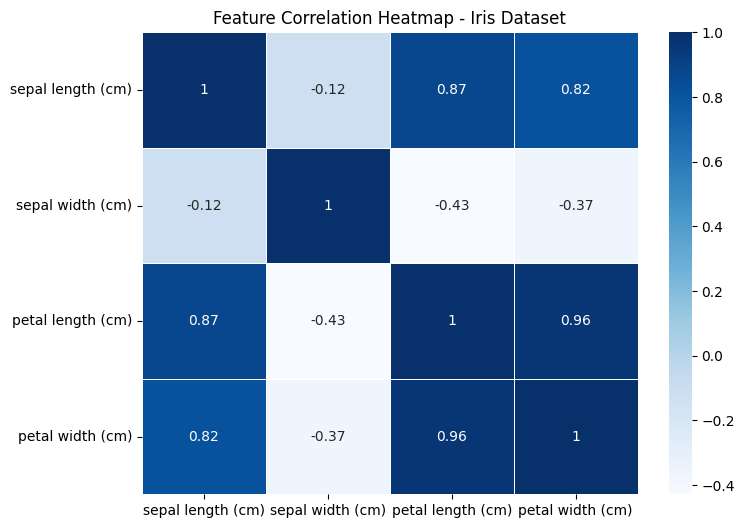

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Create the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title("Feature Correlation Heatmap - Iris Dataset")
plt.show()


# **🌳 Random Forest Classifier**

🌳 Random Forest Classifier

✔️ Type: Ensemble method (many decision trees working together)

✔️ How it works:

builds many decision trees on random subsets of data/features

averages their predictions (majority vote for classification)

each tree might overfit, but averaging them reduces overfitting

✔️ Advantages:

works well with nonlinear and complex relationships

robust to outliers

handles missing data reasonably

works with minimal feature scaling

✔️ Disadvantages:

more computationally heavy

harder to interpret

can overfit on small datasets without tuning.

# **Train-test split**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target, name='species')


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Train the Model Random Forest Classifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier

# initialize
clf = RandomForestClassifier(random_state=42)

# train
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **Evaluate the Model**

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# predictions
y_pred = clf.predict(X_test)

# accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


# **➕ Logistic Regression**

➕ Logistic Regression

✔️ Type: Linear model

✔️ How it works:

fits a straight line (in high dimensions: a hyperplane)

predicts probabilities using a logistic/sigmoid function

uses coefficients for each feature

✔️ Advantages:

easy to interpret (coefficients = feature impact)

fast to train

performs well if the data is linearly separable

very simple and robust

✔️ Disadvantages:

poor performance on strongly nonlinear relationships

needs scaled features if large feature differences

underfits on complex patterns

# **Train Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with multinomial
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **Evaluate Logistic Regression**

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


# **Both Training and Testing accuracy**

In [27]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
logreg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

In [28]:
# predict on training data
y_train_pred = logreg.predict(X_train)

# accuracy on training set
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# accuracy on test set
test_acc = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.975
Testing Accuracy: 0.9666666666666667


# **Decision Boundary Visualization for LogisticRegression And RandomForestClassifier**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


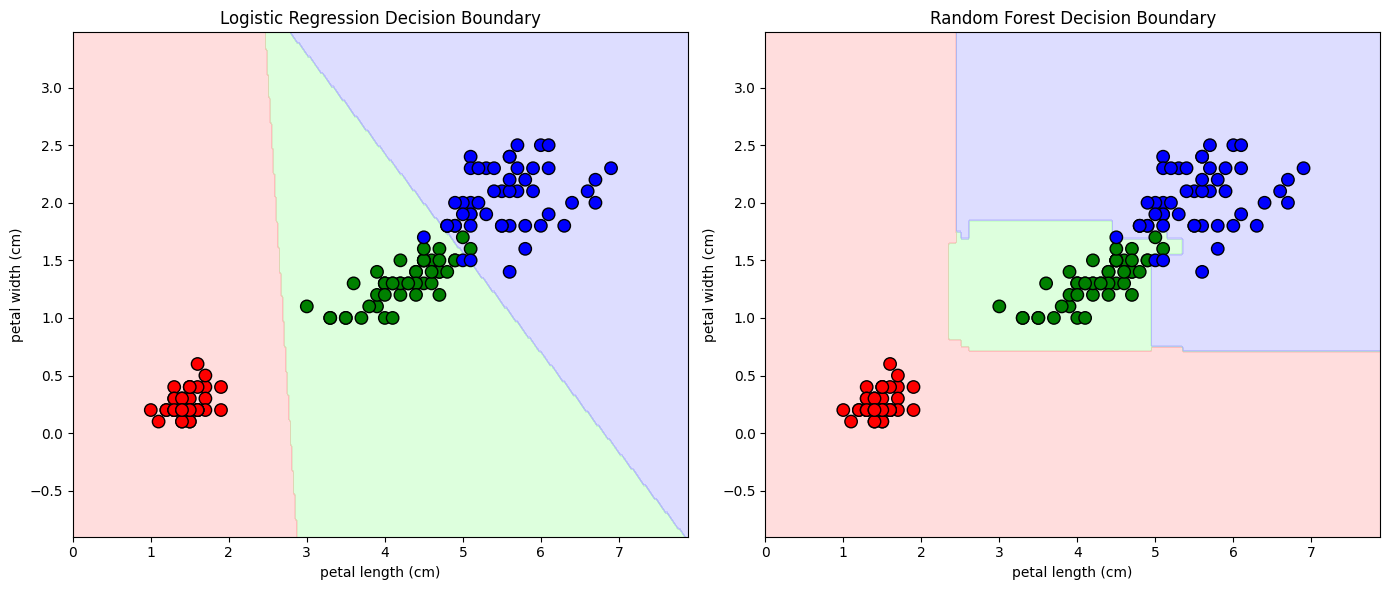

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target, name='species')


# choose 2 features
feature_x = 'petal length (cm)'
feature_y = 'petal width (cm)'

X_vis = X[[feature_x, feature_y]].values
y_vis = y

# train logistic regression on 2 features
logreg2d = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
logreg2d.fit(X_vis, np.array(y_vis))

# train random forest on 2 features
rf2d = RandomForestClassifier(random_state=42)
rf2d.fit(X_vis, np.array(y_vis))

# meshgrid for visualization
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# predictions
Z_logreg = logreg2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_rf = rf2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# plot
plt.figure(figsize=(14,6))

# Logistic Regression plot
plt.subplot(1,2,1)
cmap_bg = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_pts = ListedColormap(['red', 'green', 'blue'])

plt.contourf(xx, yy, Z_logreg, alpha=0.4, cmap=cmap_bg)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=np.array(y_vis), cmap=cmap_pts, edgecolor='k', s=80)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel(feature_x)
plt.ylabel(feature_y)

# Random Forest plot
plt.subplot(1,2,2)
plt.contourf(xx, yy, Z_rf, alpha=0.4, cmap=cmap_bg)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=np.array(y_vis), cmap=cmap_pts, edgecolor='k', s=80)
plt.title("Random Forest Decision Boundary")
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.tight_layout()
plt.show()

# **Accuracy Comparison**

In [40]:
# Assuming you already have these
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test))    # around 97%
rf_accuracy = accuracy_score(y_test, clf.predict(X_test))           # around 90%

# for clarity, print
print(f"Logistic Regression accuracy: {logreg_accuracy:.2f}")
print(f"Random Forest accuracy: {rf_accuracy:.2f}")


Logistic Regression accuracy: 0.97
Random Forest accuracy: 0.90


# **Plot the bar graph**

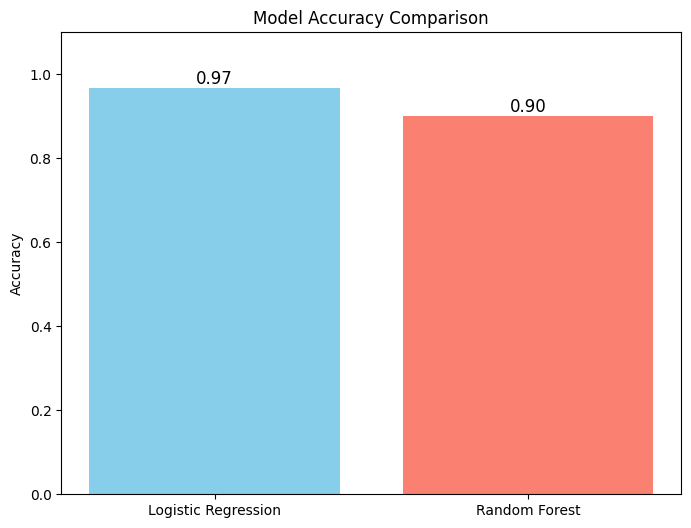

In [41]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest']
accuracies = [logreg_accuracy, rf_accuracy]

plt.figure(figsize=(8,6))
bars = plt.bar(models, accuracies, color=['skyblue', 'salmon'])

# add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


# **✅ Quick Visualization Difference**

**Random Forest**:

builds wiggly, irregular boundaries

great for complicated patterns

**Logistic Regression**:

draws straight lines

great for simple, clean, linearly separable data